<a href="https://colab.research.google.com/github/nicoelbert/AIS-Script/blob/master/aoe2net_aoe2insights_joint_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd

In [42]:
from google.colab import drive
drive.mount('/content/drive')

matches_df = pd.read_csv('drive/MyDrive/Uni/Lehrstuhl/aoe_data/joint_matches_df.csv')
matches_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,match_id,recordfile,avg_rating,map_size,game_duration,p1_civ,p2_civ,p1_strategy,p2_strategy,p1_feudal_time,p1_castle_time,p1_imperial_time,p2_feudal_time,p2_castle_time,p2_imperial_time,p1_builds,p1_que_units,p2_builds,p2_que_units,p1_tc_x_pos,p1_tc_y_pos,p2_tc_x_pos,p2_tc_y_pos,p1_Stone_close_forward,p1_Stone_far_forward,p1_Stone_backward,p1_Gold_close_forward,p1_Gold_far_forward,p1_Gold_backward,p1_Food_close_forward,p1_Food_far_forward,p1_Food_backward,p1_Relic_close_forward,p1_Relic_far_forward,p1_Relic_backward,p2_Stone_close_forward,p2_Stone_far_forward,p2_Stone_backward,p2_Gold_close_forward,p2_Gold_far_forward,p2_Gold_backward,p2_Food_close_forward,p2_Food_far_forward,p2_Food_backward,p2_Relic_close_forward,p2_Relic_far_forward,p2_Relic_backward,winner
0,125537954,AgeIIDE_Replay_125537954.aoe2record,855.0,120,3058003,Italians,unkown,scout_rush,NaN,683070.0,1407556.0,2322893.0,720758.0,1176956.0,2412127.0,0,0,0,0,56,10,27,95,5,4,6,4,27,3,19,7,2,0,2,1,0,0,15,0,18,7,11,2,9,0,2,0,2
1,125512678,AgeIIDE_Replay_125512678.aoe2record,NaN,120,2465768,Turks,Ethiopians,NaN,archer_rush,813327.0,1875428.0,NaN,676876.0,1663020.0,NaN,0,0,0,0,15,60,100,65,5,4,2,7,0,11,16,2,3,0,2,1,4,0,7,3,1,14,18,1,2,0,1,1,2
2,125508148,AgeIIDE_Replay_125508148.aoe2record,1144.5,120,683447,Ethiopians,Magyars,drush,NaN,612075.0,NaN,NaN,644611.0,NaN,NaN,0,0,0,0,58,97,41,21,5,4,3,3,5,10,1,2,16,0,1,2,0,3,9,0,8,10,6,5,7,0,0,2,1
3,125508135,AgeIIDE_Replay_125508135.aoe2record,1042.5,120,1721599,Franks,Goths,scout_rush,drush,649810.0,1509207.0,NaN,634102.0,1454566.0,NaN,0,0,0,0,99,44,36,94,5,6,0,7,3,8,5,4,7,0,0,2,4,0,7,0,7,11,0,1,15,0,1,2,1
4,125504542,AgeIIDE_Replay_125504542.aoe2record,1415.0,120,3711710,Cumans,Lithuanians,scout_rush,drush,556842.0,1629719.0,2876934.0,556646.0,1424619.0,3059159.0,0,0,0,0,19,37,90,84,2,4,5,0,11,7,10,1,7,0,2,0,4,0,7,7,3,8,1,2,15,0,2,1,1


In [43]:
matches_df.describe()

,match_id,avg_rating,map_size,game_duration,p1_feudal_time,p1_castle_time,p1_imperial_time,p2_feudal_time,p2_castle_time,p2_imperial_time,p1_builds,p1_que_units,p2_builds,p2_que_units,p1_tc_x_pos,p1_tc_y_pos,p2_tc_x_pos,p2_tc_y_pos,p1_Stone_close_forward,p1_Stone_far_forward,p1_Stone_backward,p1_Gold_close_forward,p1_Gold_far_forward,p1_Gold_backward,p1_Food_close_forward,p1_Food_far_forward,p1_Food_backward,p1_Relic_close_forward,p1_Relic_far_forward,p1_Relic_backward,p2_Stone_close_forward,p2_Stone_far_forward,p2_Stone_backward,p2_Gold_close_forward,p2_Gold_far_forward,p2_Gold_backward,p2_Food_close_forward,p2_Food_far_forward,p2_Food_backward,p2_Relic_close_forward,p2_Relic_far_forward,p2_Relic_backward,winner
count,1.314000e+03,1302.000000,1314.0,1.314000e+03,1.311000e+03,1.288000e+03,5.950000e+02,1.312000e+03,1.287000e+03,5.870000e+02,1314.0,1314.0,1314.0,1314.0,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.00000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.00000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,1.185816e+08,1195.397849,120.0,2.447627e+06,6.417536e+05,1.185339e+06,2.409869e+06,6.411587e+05,1.169510e+06,2.399961e+06,0.0,0.0,0.0,0.0,57.314307,57.478691,56.547945,56.664384,2.378234,3.212329,5.80898,3.286910,6.511416,9.057078,5.044140,4.802131,10.052511,0.003805,1.243531,1.26484,2.436834,3.231355,5.849315,3.385084,6.515221,8.808980,4.977169,4.998478,9.940639,0.009132,1.125571,1.308219,1.518265
std,5.175640e+06,313.017285,0.0,9.757494e+05,1.332867e+05,4.763271e+05,3.794798e+05,1.316673e+05,4.753880e+05,3.579175e+05,0.0,0.0,0.0,0.0,29.254656,28.534341,28.735014,29.015806,2.544504,2.845844,3.32145,3.479768,5.768465,4.424601,3.894011,5.498636,8.012527,0.061592,0.979637,0.86298,2.507454,3.063391,3.278419,3.452115,5.835143,4.518647,3.830900,5.828600,8.376670,0.102855,0.883237,0.871033,0.522212
min,1.083439e+08,129.500000,120.0,4.994000e+03,0.000000e+00,0.000000e+00,1.248512e+06,0.000000e+00,0.000000e+00,1.232401e+06,0.0,0.0,0.0,0.0,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.146346e+08,979.250000,120.0,1.779622e+06,5.964640e+05,1.134458e+06,2.175513e+06,5.962882e+05,1.126039e+06,2.195368e+06,0.0,0.0,0.0,0.0,28.000000,29.000000,29.000000,27.250000,0.000000,0.000000,4.00000,0.000000,4.000000,6.000000,2.000000,2.000000,6.000000,0.000000,1.000000,1.00000,0.000000,0.000000,4.000000,0.000000,4.000000,5.000000,2.000000,2.000000,5.000000,0.000000,0.000000,1.000000,1.000000
50%,1.194007e+08,1140.750000,120.0,2.401834e+06,6.346320e+05,1.314374e+06,2.377242e+06,6.336905e+05,1.304021e+06,2.384720e+06,0.0,0.0,0.0,0.0,58.000000,59.000000,55.000000,56.000000,2.000000,3.000000,6.00000,2.000000,7.000000,10.000000,4.000000,4.000000,9.000000,0.000000,1.000000,1.00000,2.000000,3.000000,6.000000,3.000000,7.000000,8.000000,4.000000,4.000000,9.000000,0.000000,1.000000,1.000000,2.000000
75%,1.232328e+08,1377.500000,120.0,3.014785e+06,7.001170e+05,1.435504e+06,2.602549e+06,6.940368e+05,1.421401e+06,2.602854e+06,0.0,0.0,0.0,0.0,87.000000,84.000000,85.000000,84.000000,5.000000,5.000000,7.00000,7.000000,8.000000,11.000000,7.000000,6.000000,12.000000,0.000000,2.000000,2.00000,5.000000,5.000000,7.000000,7.000000,8.000000,11.000000,7.000000,6.000000,12.000000,0.000000,2.000000,2.000000,2.000000
max,1.255380e+08,2478.000000,120.0,6.575004e+06,1.241752e+06,2.748516e+06,4.739746e+06,1.434351e+06,2.620609e+06,3.965031e+06,0.0,0.0,0.0,0.0,109.000000,105.000000,105.000000,109.000000,9.000000,22.000000,23.00000,15.000000,58.000000,27.000000,25.000000,51.000000,64.000000,1.000000,4.000000,4.00000,9.000000,24.000000,21.000000,14.000000,63.0000

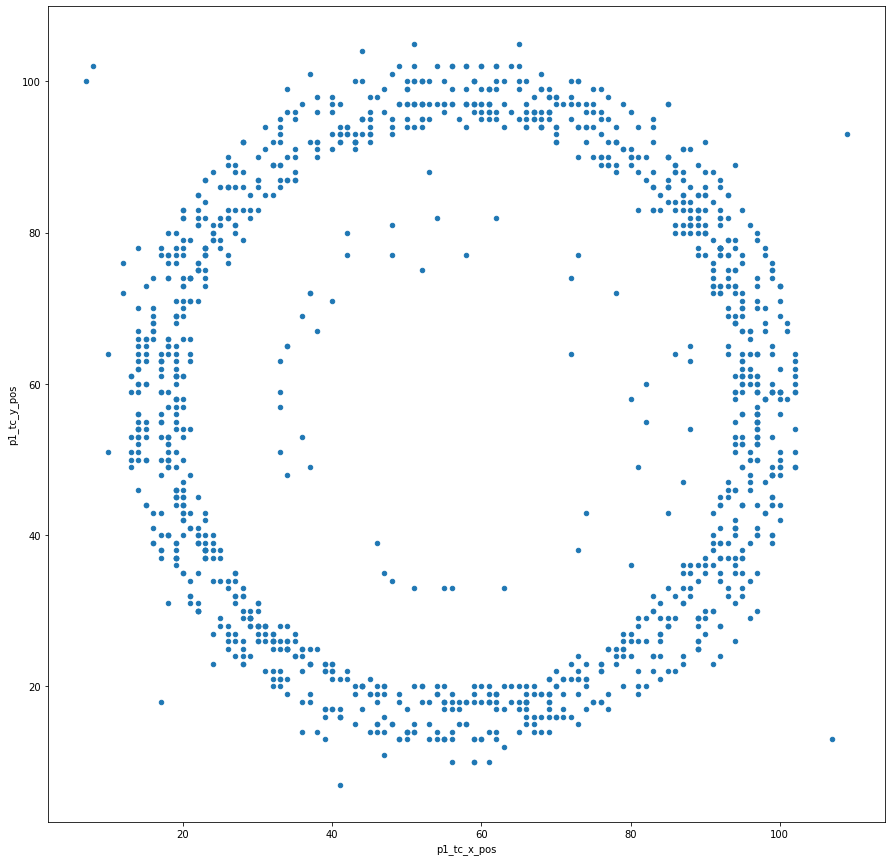

In [44]:
matches_df.plot.scatter(x="p1_tc_x_pos", y ="p1_tc_y_pos", figsize = (15,15))

In [45]:
tc_pos_df = matches_df

In [46]:
tc_pos_normed = {}

for index, row in tc_pos_df.iterrows():
  tc_pos_normed[index] = {}

  tc_pos_normed[index]['game_id'] = row['match_id']
  tc_pos_normed[index]['winner'] = row['winner']
  
  if row['winner'] == 1:
    tc_pos_normed[index]['w_tc_x_pos'] = row['p1_tc_x_pos']
    tc_pos_normed[index]['w_tc_y_pos'] = row['p1_tc_y_pos']
    tc_pos_normed[index]['l_tc_x_pos'] = row['p2_tc_x_pos']
    tc_pos_normed[index]['l_tc_y_pos'] = row['p2_tc_y_pos']
  else:
    tc_pos_normed[index]['l_tc_x_pos'] = row['p1_tc_x_pos']
    tc_pos_normed[index]['l_tc_y_pos'] = row['p1_tc_y_pos']
    tc_pos_normed[index]['w_tc_x_pos'] = row['p2_tc_x_pos']
    tc_pos_normed[index]['w_tc_y_pos'] = row['p2_tc_y_pos']

  



tc_pos_normed_df = pd.DataFrame.from_dict(tc_pos_normed,orient="index")

In [47]:
tc_pos_normed_df.head()
#norm 2d focus on center and plot to see if distance plot makes sense
#then norm 1 d with distance to center via function -> heatmap 

,game_id,winner,l_tc_x_pos,l_tc_y_pos,w_tc_x_pos,w_tc_y_pos
0,125537954,2,56,10,27,95
1,125512678,2,15,60,100,65
2,125508148,1,41,21,58,97
3,125508135,1,36,94,99,44
4,125504542,1,90,84,19,37
